In [1]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
####################################      T E S T D E V      O N     F X C M      #########################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
########################################################################################################################### 

In [2]:
# CLEAR VAR
from clearall import clearall
clearall()

Début des opérations
 Regression Linéaire Imbalanced pour  EUR/USD 
Signaux achat avant oversampling Counter({0: 751250, 1: 124})
Signaux vente avant oversampling Counter({0: 751243, 1: 131})
Signaux achat après oversampling Counter({0: 751250, 1: 375625})
Signaux vente après oversampling Counter({0: 751243, 1: 375621})
Achat - Accuracy: 0.963
Achat - Precision: 0.906
Achat - Recall: 0.993
Achat - F-measure: 0.947
Vente - Accuracy: 0.963
Vente - Precision: 0.907
Vente - Recall: 0.990
Vente - F-measure: 0.947
Best Threshold=1.000000, G-Mean=0.969


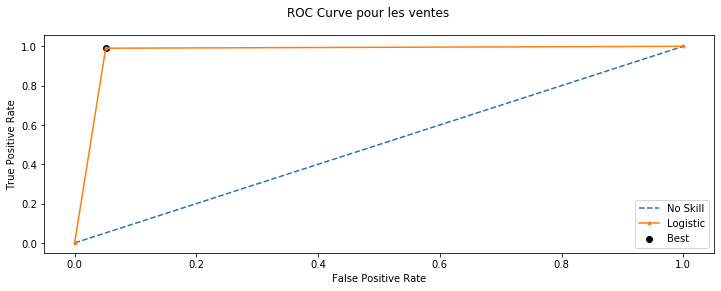

Best Threshold=1.000000, F-Score=0.947


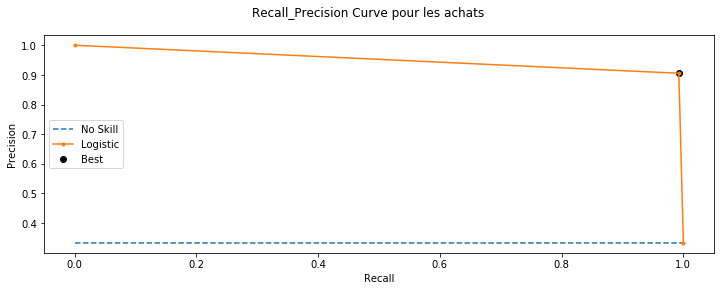

Best Threshold=1.000000, F-Score=0.947


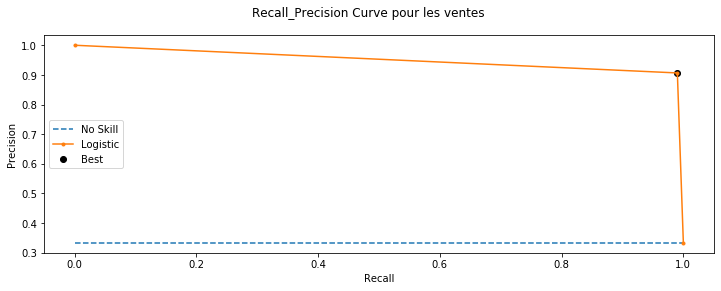



 ===> Génération des signaux terminée. Tout est nettoyé et prêt à l'utilisation
Temps d'excution du module 0:01:06.870485


In [1]:
import datetime as dt
from imbalreglog import imbal_reglog
x='EUR/USD'
_t1 = dt.datetime.now()
print('Début des opérations')
imbal_reglog(x)
print("\n\n ===> Imbalanced RegLog terminée. Tout est nettoyé et prêt à l'utilisation")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

In [1]:
import time

In [2]:
%%time
import pandas as pd
import talib
import os
import datetime as dt
from scraptickers import scrap_tickers
import pyttsx3

import configparser
config = configparser.ConfigParser()

config.read('config.ini')
_period1 = config.get('TIMEFRAME','_period1') # 'm5'
_period2 = config.get('TIMEFRAME','_period2') # 'H1'
_period3 = config.get('TIMEFRAME','_period3') # 'D1'
_path1 = config.get('PATH','_path1') # 'Base/'
_path2 = config.get('PATH','_path2') # 'Base_Clean/'
_path3 = config.get('PATH','_path3') # 'Base_Input/'
_path = _path2
config['PATH']['_path'] = _path # 'Base_Clean/'
with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)

TICKERS = scrap_tickers(_path)
config['TICKERS']['TICKERS'] = \
            str(TICKERS).replace("'",'').replace('[','').replace(']','').replace(',','').replace(' ',',')

with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)

x = 'EURUSD'

engine = pyttsx3.init()

engine.say("Setting of the in put")
engine.runAndWait()
    
globals()['df1_%s' %x.replace('/','')] = pd.read_csv(_path+x.replace('/','')+_period1+'.csv')
globals()['df1_%s' %x.replace('/','')] = globals()['df1_%s' %x.replace('/','')].set_index(globals()['df1_%s' %x.replace('/','')].Date,drop = True)
globals()['df1_%s' %x.replace('/','')] = globals()['df1_%s' %x.replace('/','')].drop(['Date'],axis=1)

globals()['df2_%s' %x.replace('/','')] = pd.read_csv(_path+x.replace('/','')+_period2+'.csv')
globals()['df2_%s' %x.replace('/','')] = globals()['df2_%s' %x.replace('/','')].set_index(globals()['df2_%s' %x.replace('/','')].Date,drop = True)
globals()['df2_%s' %x.replace('/','')] = globals()['df2_%s' %x.replace('/','')].drop(['Date'],axis=1)

#_bar += 1
#globals()['df3_%s' %x.replace('/','')] = pd.read_csv(_path+x.replace('/','')+_period3+'.csv')
#globals()['df3_%s' %x.replace('/','')] = globals()['df3_%s' %x.replace('/','')].set_index(globals()['df3_%s' %x.replace('/','')].Date,drop = True)
#globals()['df3_%s' %x.replace('/','')] = globals()['df3_%s' %x.replace('/','')].drop(['Date'],axis=1)

df1 = globals()['df1_%s' %x.replace('/','')].copy()
df2 = globals()['df2_%s' %x.replace('/','')].copy()

Base_Clean/
CPU times: user 2.72 s, sys: 463 ms, total: 3.18 s
Wall time: 6.72 s


In [5]:
df1.shape, df1.index[0], df1.index[-1], len(df1)

((751406, 15), &#39;2010-09-06 17:00:00&#39;, &#39;2020-09-07 01:00:00&#39;, 751406)

In [6]:
df2.shape,df2.index[0], df2.index[-1]

((63064, 13), &#39;2010-09-06 17:00:00&#39;, &#39;2020-09-07 00:00:00&#39;)

In [8]:
%%time
df1['delta_MM21_MM34'] = talib.EMA(df1.Close, timeperiod=21) - talib.EMA(df1.Close, timeperiod=34)
df1['BOLUP'],df1['BOLMID'],df1['BOLLOW'] = talib.BBANDS(df1.Close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
df1['delta_price_BOLLOW'] = df1.CloseBid - df1.BOLLOW
df1['delta_price_BOLUP'] = df1.CloseBid - df1.BOLUP
df1 = df1.drop(['BOLUP','BOLMID','BOLLOW'],axis=1)

CPU times: user 162 ms, sys: 89.7 ms, total: 252 ms
Wall time: 256 ms


In [9]:
df1

,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Total,Open,High,Low,Close,HigMax,LowMin,delta_MM21_MM34,delta_price_BOLLOW,delta_price_BOLUP
Date,,,,,,,,,,,,,,,,,,
2010-09-06 17:00:00,1.28739,1.28817,1.28729,1.28802,1.28753,1.28831,1.28747,1.28820,55,1.287460,1.288240,1.287380,1.288110,1.28817,1.28693,NaN,NaN,NaN
2010-09-06 17:05:00,1.28802,1.28814,1.28792,1.28793,1.28820,1.28828,1.28810,1.28810,20,1.288110,1.288210,1.288010,1.288015,1.28815,1.28693,NaN,NaN,NaN
2010-09-06 17:10:00,1.28793,1.28815,1.28783,1.28792,1.28810,1.28830,1.28800,1.28805,73,1.288015,1.288225,1.287915,1.287985,1.28815,1.28693,NaN,NaN,NaN
2010-09-06 17:15:00,1.28792,1.28803,1.28783,1.28784,1.28805,1.28818,1.28800,1.28802,29,1.287985,1.288105,1.287915,1.287930,1.28813,1.28693,NaN,NaN,NaN
2010-09-06 17:20:00,1.28784,1.28813,1.28782,1.28784,1.28802,1.28841,1.28800,1.28809,20,1.287930,1.288270,1.287910,1.287965,1.28813,1.28693,NaN,-0.000161,-0.000161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-07 00:40:00,1.18371,1.18390,1.18369,1.18378,1.18382,1.18402,1.18382,1.18391,432,1.183765,1.183960,1.183755,1.183845,NaN,NaN,-0.000097,0.000397,-0.000143
2020-09-07 00:45:00,1.18378,1.18421,1.18378,1.18414,1.18391,1.18433,1.18389,1.18427,1004,1.183845,1.184270,1.183835,1.184205,NaN,NaN,-0.000077,0.000857,-0.000137
2020-09-07 00:50:00,1.18414,1.18417,1.18340,1.18360,1.18427,1.18428,1.18353,1.18372,1030,1.184205,1.184225,1.183465,1.183660,NaN,NaN,-0.000078,0.000201,-0.000637
